# Homework 5

Estimate the distribution of log luminance levels in the Ruderman natural image dataset. For each image, transform it by taking the log
of the pixel luminance values, and subtracting the mean value of log luminance across each image. Show the estimate of the error bars on this distribution of mean-subtracted log-luminances, $y$, by thinking about what “independent samples” are in this dataset (you do not need to do a full bootstrap analysis). Show that the left and right tails of this distribution are approximately exponential, i.e., $$P_+ (y) \propto exp(-\mu_+ |y|)$$
and
$$P_-(y) \propto exp(-\mu_-|y|)$$

where P ± stand for the positive (or, respectively, the negative) tails of the log-luminance distribution. Do this by finding the two best-fitting constants, μ + and μ and plotting the tails on top of the normalized distribution for y. A good choice to define the positive and negative tails is to use the threshold of |y| > 1. How you do the fitting (linear regression in log-luminance space, 2 fitting of raw histograms) is up to you, but explain clearly what you did.

estimate the pdf on each image: error is std on ??.
same binning is crucial!

In [227]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

### Import the data

In [314]:
# Prepare the filenames using glob
fnames = glob.glob('ruderman/image_*.txt')
dim = np.loadtxt('ruderman/image_1.txt').shape[0] # image dimension

# Import each image into a dictionary
ruderman_dict = {}
for file in range(len(fnames)):
    fname = fnames[file]
    image = np.loadtxt(fname) # import image
    image = np.ravel(image) # flatten image
    ruderman_dict[f'image_{file}'] = image

ruderman = pd.DataFrame.from_dict(ruderman_dict)

In [298]:
ruderman.iloc[:,0]

0        0.056080
1        0.036769
2        0.080321
3        0.121278
4        0.067869
           ...   
65531    0.017257
65532    0.021791
65533    0.021106
65534    0.025098
65535    0.023195
Name: image_0, Length: 65536, dtype: float64

### Visualize some images as a sanity check

In [199]:
# Figure dimensions:
imgfigdims = 15,4
histfigdims = 20,4

In [368]:
# Unravel the images
def get_image(dataset, image_idx):
    image = np.array(dataset.iloc[:,image_idx]).reshape((dim,dim))
    return image

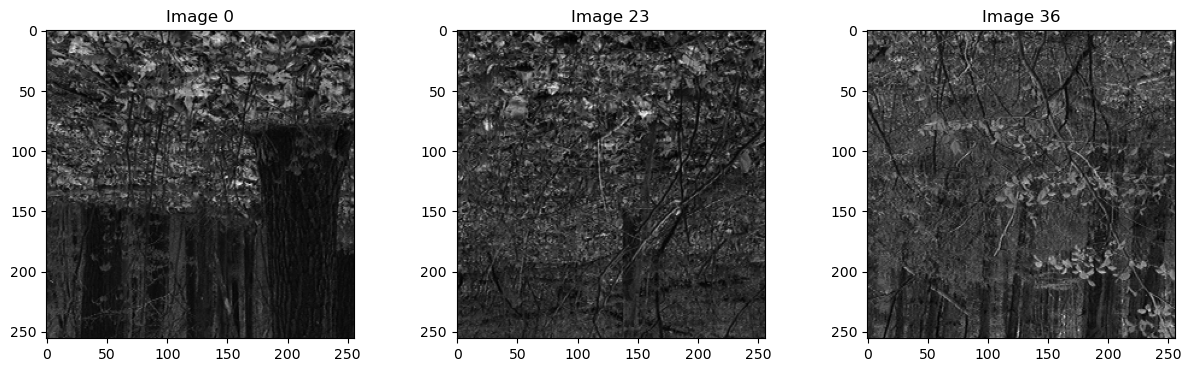

In [369]:
plt.figure(figsize=(imgfigdims))

plt.subplot(131)
image_idx = 0
image = get_image(ruderman, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(132)
image_idx = 23
image = get_image(ruderman, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(133)
image_idx = 36
image = get_image(ruderman, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.show()

### Plot some sample image distributions and check what the population distribution looks like

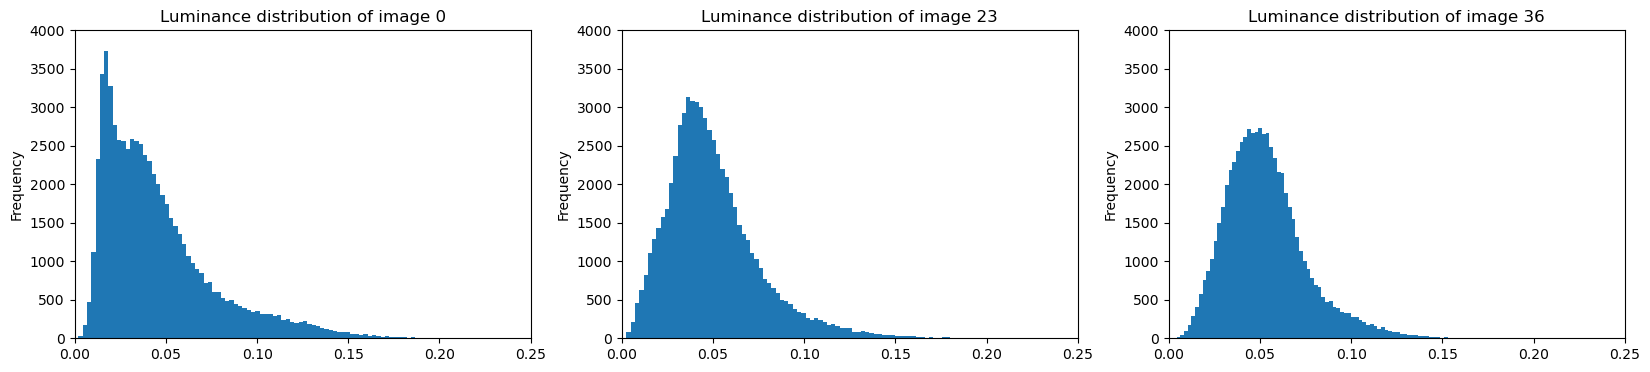

In [333]:
# Plot the luminance distribution of some sample images
plt.figure(figsize=(histfigdims))
xlim = 0, 0.25
ylim = 0,4000

image_idx = 0
plt.subplot(131)
ruderman.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Luminance distribution of image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 23
plt.subplot(132)
ruderman.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Luminance distribution of image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 36
plt.subplot(133)
ruderman.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Luminance distribution of image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

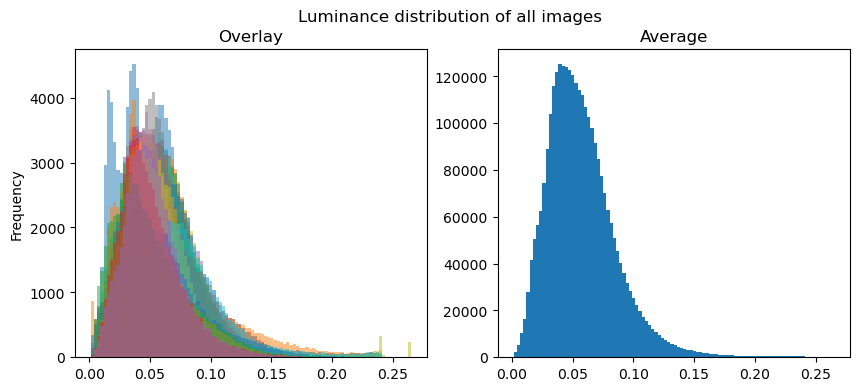

In [366]:
# Plot the luminance distribution of all images
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=False)
plt.suptitle('Luminance distribution of all images')

# Plot overlay
ruderman.plot.hist(ax=ax1, bins=100, legend=False, alpha=0.5)
ax1.set_title('Overlay')

# Plot average histogram
ruderman_all_flattened = ruderman.to_numpy().flatten()
ax2.hist(ruderman_all_flattened, bins=100)
ax2.set_title('Average')

plt.show()

## For each image, transform it by taking the log of the pixel luminance values, and subtracting the mean value of log luminance across each image.

In [371]:
ruderman_transformed = np.log(ruderman)

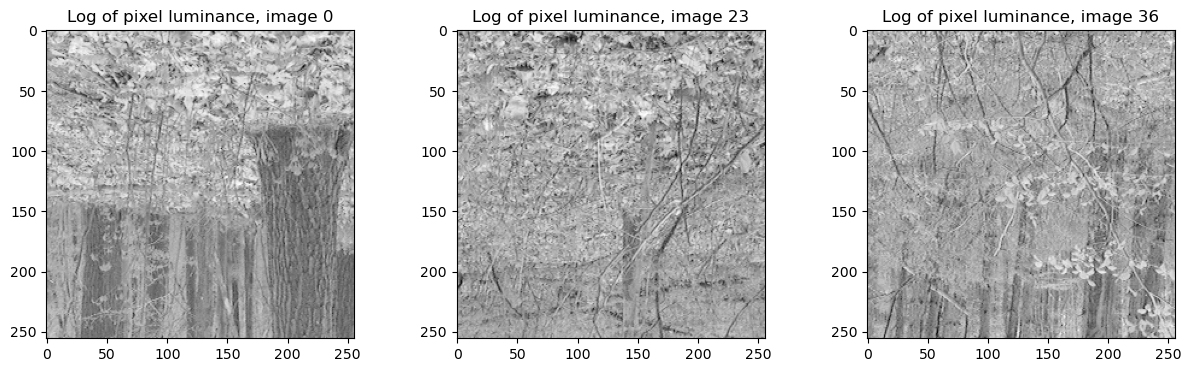

In [373]:
plt.figure(figsize=(imgfigdims))

plt.subplot(131)
image_idx = 0
image = get_image(ruderman_transformed, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')

plt.subplot(132)
image_idx = 23
image = get_image(ruderman_transformed, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')

plt.subplot(133)
image_idx = 36
image = get_image(ruderman_transformed, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Log of pixel luminance, image {image_idx}')

plt.show()

### Visualize the new distributions

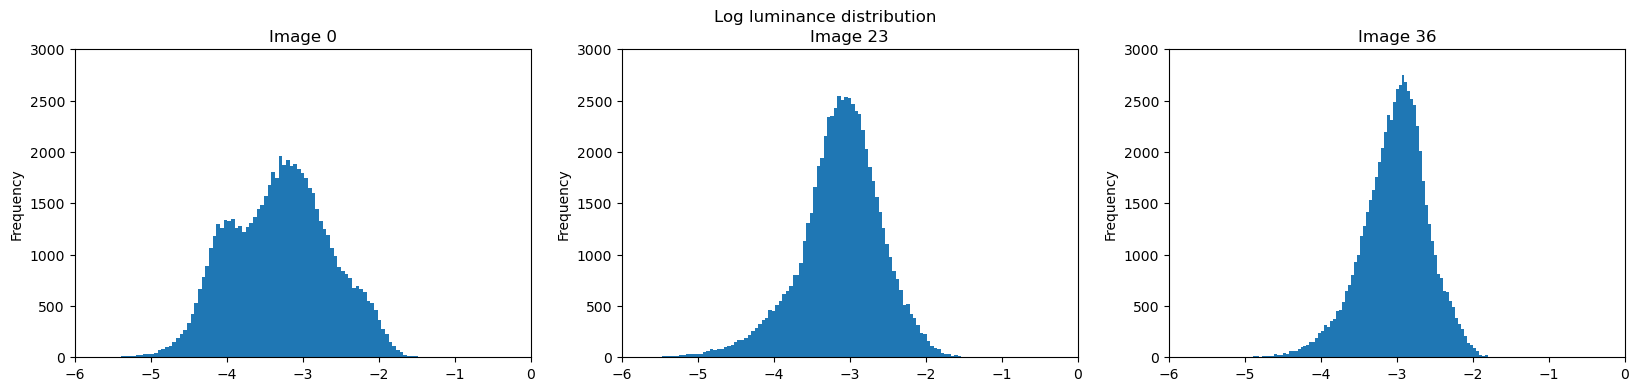

In [418]:
plt.figure(figsize=(histfigdims))
plt.suptitle('Log luminance distribution')
xlim = -6, 0
ylim = 0,3000

image_idx = 0
plt.subplot(131)
ruderman_transformed.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 23
plt.subplot(132)
ruderman_transformed.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 36
plt.subplot(133)
ruderman_transformed.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

### Find the mean log luminance value and subtract it from each image

In [404]:
# Calculate the mean log luminance for each image
mean_log_luminances = ruderman_transformed.mean()
ruderman_mean_subtracted = ruderman_transformed - mean_log_luminances

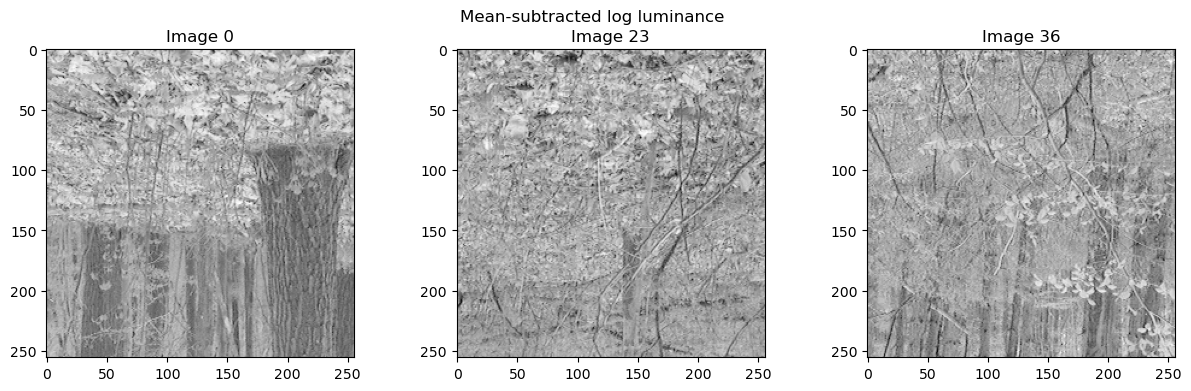

In [439]:
plt.figure(figsize=(imgfigdims))
plt.suptitle('Mean-subtracted log luminance')

plt.subplot(131)
image_idx = 0
image = get_image(ruderman_mean_subtracted, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(132)
image_idx = 23
image = get_image(ruderman_mean_subtracted, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(133)
image_idx = 36
image = get_image(ruderman_mean_subtracted, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.show()

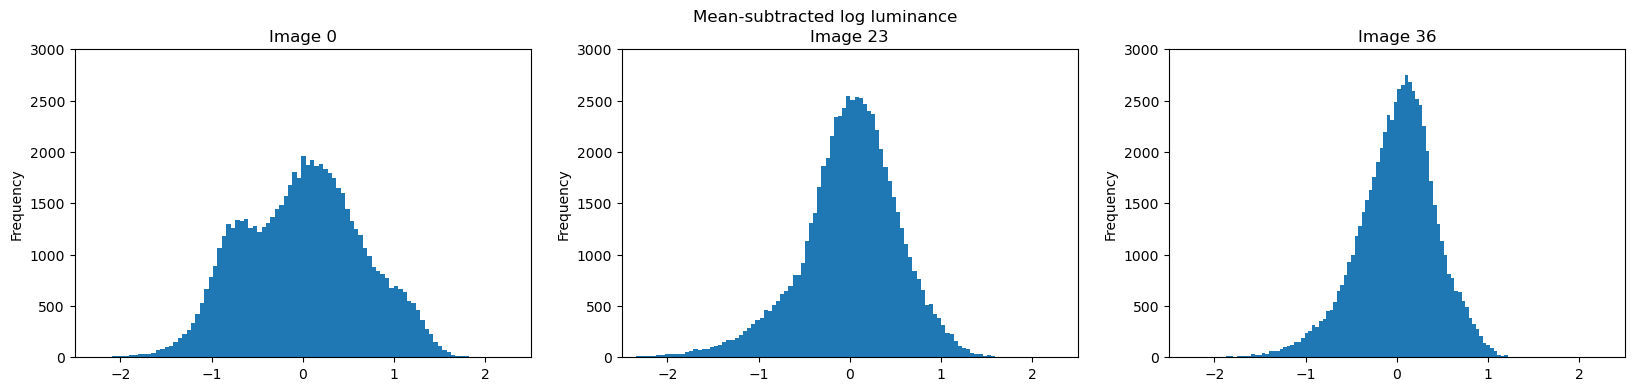

In [411]:
# Plot mean-subtracted log luminance
plt.figure(figsize=(histfigdims))
xlim = -2.5, 2.5
ylim = 0,3000
plt.suptitle('Mean-subtracted log luminance')

image_idx = 0
plt.subplot(131)
ruderman_mean_subtracted.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 23
plt.subplot(132)
ruderman_mean_subtracted.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

image_idx = 36
plt.subplot(133)
ruderman_mean_subtracted.iloc[:,image_idx].plot.hist(bins=100)
plt.title(f'Image {image_idx}')
plt.xlim(xlim)
plt.ylim(ylim)

plt.show()

## Show the estimate of the error bars on this distribution of mean-subtracted log-luminances, $y$, by thinking about what “independent samples” are in this dataset (you do not need to do a full bootstrap analysis).

I would think that independent samples are pixels that are a certain distance away from each other on a single image. 

I'm going to draw a sample of pixels from each image and plot a histogram of the distance from the mean.

I will test for independence by sampling a) adjacent pixels and b) randomly sampled pixels within an image.

In [413]:
# Draw 1000 pixels from an image
    # a) random
    # b) adjacent
# Find the distance from the image mean
# Plot as a histogram

### Randomly shuffle the mean-subtracted log luminance distribution to get rid of the within image correlations

In [443]:
ruderman_mean_sub_random = ruderman_mean_subtracted.reindex(np.random.permutation(ruderman_mean_subtracted.index))

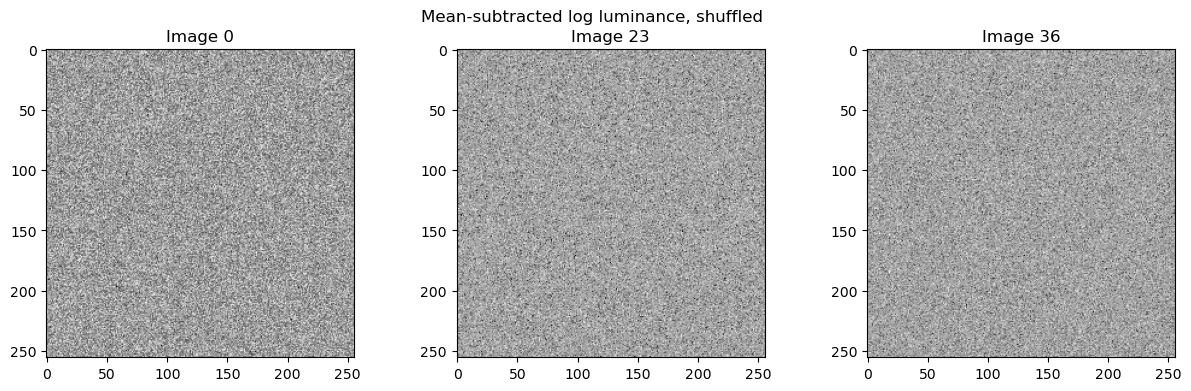

In [444]:
plt.figure(figsize=(imgfigdims))
plt.suptitle('Mean-subtracted log luminance, shuffled')

plt.subplot(131)
image_idx = 0
image = get_image(ruderman_mean_sub_random, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(132)
image_idx = 23
image = get_image(ruderman_mean_sub_random, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.subplot(133)
image_idx = 36
image = get_image(ruderman_mean_sub_random, image_idx)
plt.imshow(image, cmap='gray')
plt.title(f'Image {image_idx}')

plt.show()

### Sample from the randomly shuffled images and plot the distance from the mean

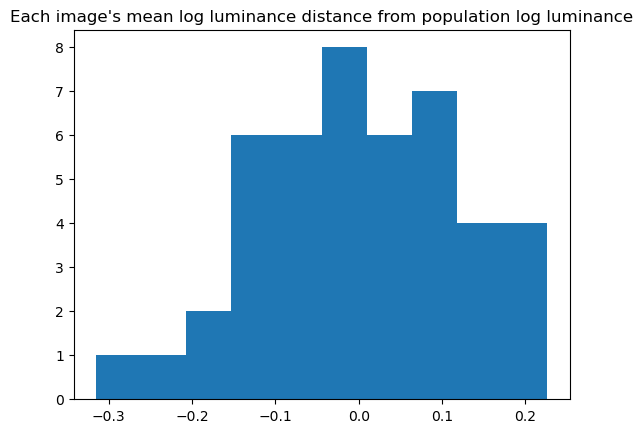

-0.3152624300122526

In [130]:
distance_from_pop_mean = mean_log_luminances - mean_log_luminance
plt.hist(distance_from_pop_mean)
plt.title("Each image's mean log luminance distance from population log luminance")
plt.show()

np.min(distance_from_pop_mean)

### Sample from contiguous segments within an image. Here the sampled distribution should be less dispersed.

Notes from recitations:

- Can z-score, so (log(L) - mean(log(L)))) / std(log(L)))

- Can't subtract the global mean, because they may have been taken in different sunlight conditions